In [1]:
# Loads the autoreload extension in Notebook
%load_ext autoreload
# Sets the autoreload mode to reload all modules before executing code
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from caits.loading import load_yaml_config
from caits.visualization import plot_signal

In [3]:
config = load_yaml_config("config.yml")

# WAV - Audio data in uni-axis (mono)

Check audio specs

In [4]:
from caits.loading import wav_specs_check

In [5]:
audio_params = wav_specs_check("data/yes.wav")

In [6]:
audio_params

{'nchannels': 1,
 'sampwidth': 2,
 'framerate': 16000,
 'nframes': 16000,
 'comptype': 'NONE',
 'compname': 'not compressed'}

Load audio

In [7]:
from caits.loading import wav_loader

In [8]:
audio_load = wav_loader("data/yes.wav")

In [9]:
print(type(audio_load))
print(type(audio_load[0]))
print(type(audio_load[1]))

<class 'tuple'>
<class 'pandas.core.frame.DataFrame'>
<class 'int'>


In [10]:
print(audio_load[0].shape)

(16000, 1)


In [11]:
print(audio_load[1])

16000


In [12]:
audio_df = audio_load[0]
audio_df.head()

,ch_1
0,-0.000763
1,-0.000824
2,-0.000732
3,-0.000549
4,-0.000427


### Plotting

Plot signal in samples

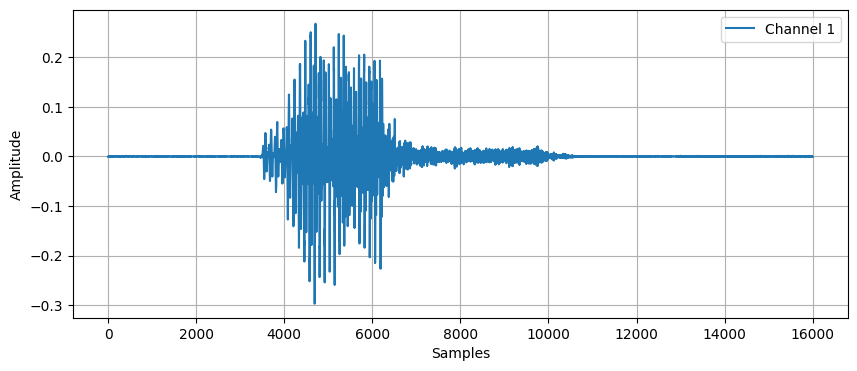

In [13]:
plot_signal(sig=audio_load[0].values, sr=audio_params["framerate"], return_mode=False)

# Amplitude by Computing the Analytic Signal with the Hilbert Transform

In [14]:
from caits.properties import amplitude_envelope_hbt, instantaneous_frequency_hbt, instantaneous_amplitude_hbt

In [15]:
samples = len(audio_df.values)
fs = audio_params["framerate"]
t = np.arange(samples) / fs

In [16]:
hl = amplitude_envelope_hbt(audio_load[0].values)
print(hl.shape)

# flatten the array
arr = hl.flatten()

ifr = instantaneous_frequency_hbt(arr, fs=audio_params["framerate"])
iamp = instantaneous_amplitude_hbt(arr)

print(ifr.shape)
print(iamp.shape)

(16000, 1)
(15999,)
(16000,)


In [17]:
ifr_max = ifr.max()
iamp_max = iamp.max()
iamp_min = iamp.min()

print(ifr_max)
print(iamp_max)
print(iamp_min)

7999.999999999247
0.30075283499120536
3.81245008592046e-06


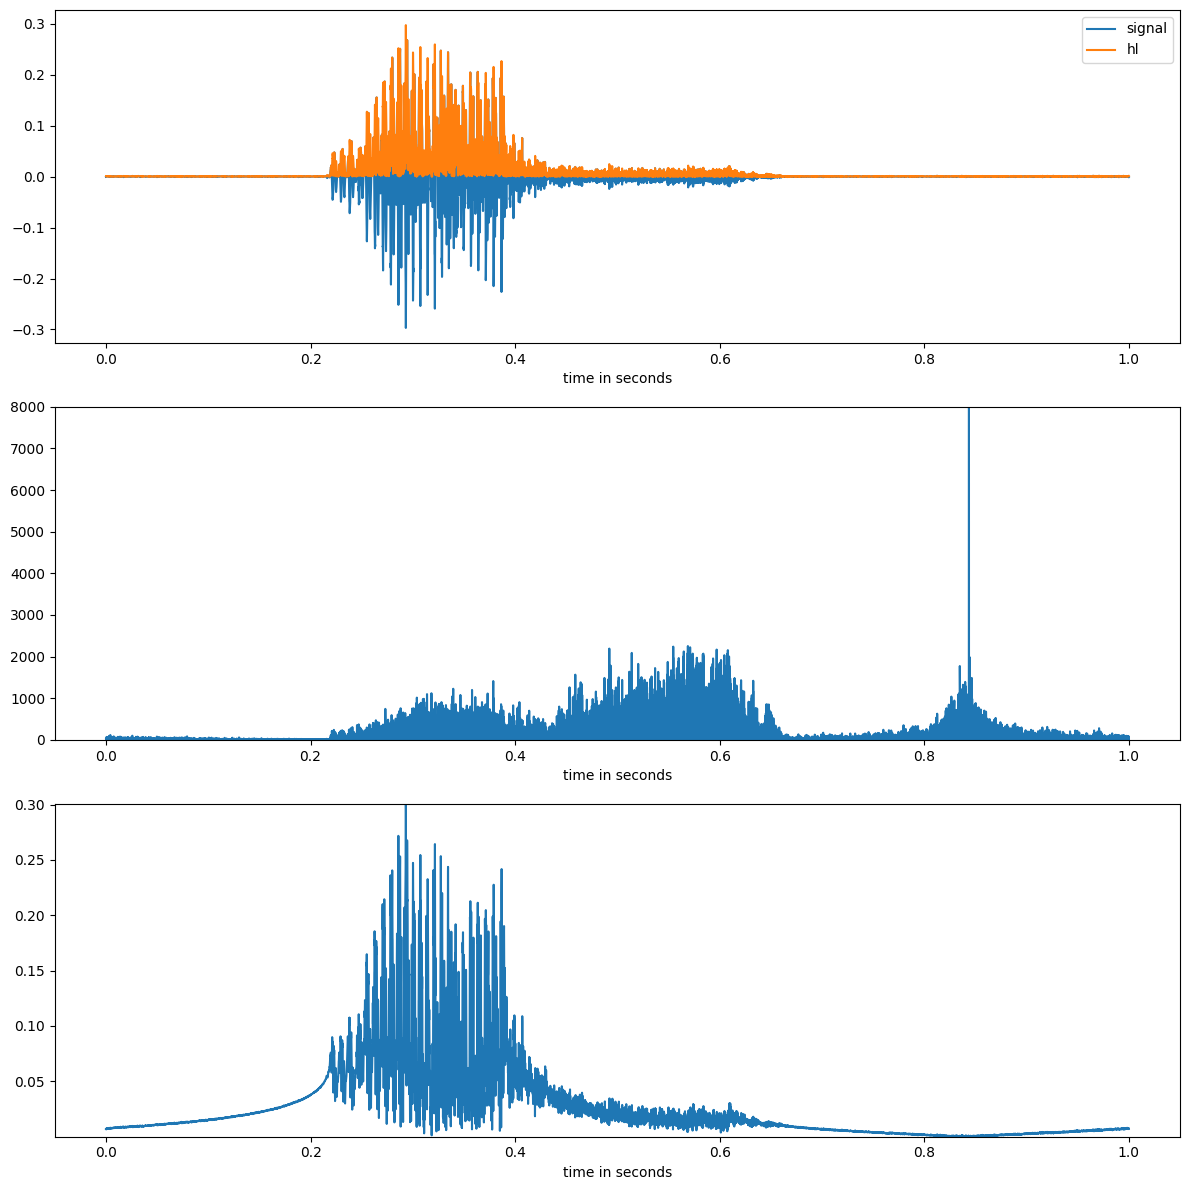

In [18]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(12, 12))
ax0.plot(t, audio_load[0].values, label='signal')
ax0.plot(t, hl, label='hl')
ax0.set_xlabel("time in seconds")
ax0.legend()
ax1.plot(t[1:], ifr)
ax1.set_xlabel("time in seconds")
ax1.set_ylim(0.0, ifr_max)
ax2.plot(t, iamp)
ax2.set_xlabel("time in seconds")
ax2.set_ylim(iamp_min, iamp_max)
fig.tight_layout()

# CSV - Multi-axis Motion Data

In [19]:
motion_df = pd.read_csv("data/scratching_eye.csv")

In [20]:
motion_df.head()

,acc_x_axis_g,acc_y_axis_g,acc_z_axis_g,gyr_x_axis_deg/s,gyr_y_axis_deg/s,gyr_z_axis_deg/s
0,1.131,0.342,-0.063,37.515,-44.408,-62.647
1,1.120,0.323,-0.241,35.563,22.143,-35.258
2,1.023,0.431,-0.146,42.212,78.263,-1.525
3,0.856,0.600,0.086,50.142,131.516,18.056
4,0.752,0.709,0.327,55.815,168.116,26.779


In [21]:
motion_df.shape

(1034, 6)

In [22]:
motion_channels = motion_df.columns
motion_channels

Index(['acc_x_axis_g', 'acc_y_axis_g', 'acc_z_axis_g', 'gyr_x_axis_deg/s',
       'gyr_y_axis_deg/s', 'gyr_z_axis_deg/s'],
      dtype='object')

In [23]:
# transform motion_channels object to list
motion_channels = motion_channels.tolist()

### Plotting

Plot the signals in samples and add the channels' names

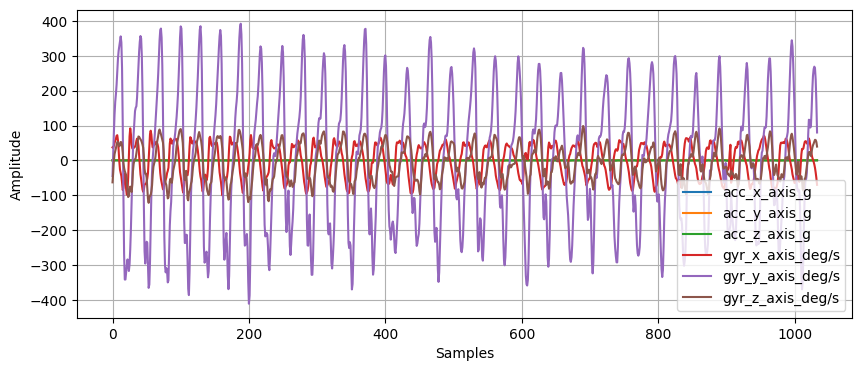

In [24]:
plot_signal(
    motion_df.values, 
    sr=config["sampling_rate"], 
    channels=motion_channels, 
    return_mode=False
)

In [25]:
motion_df.values.shape

(1034, 6)

### 

In [26]:
motion_axis = motion_df.values[:, 0]
motion_axis.shape

(1034,)

In [27]:
samples = len(motion_axis)
fs = audio_params["framerate"]
t = np.arange(samples) / fs
print("time:", t)

hl = amplitude_envelope_hbt(motion_axis)
print(hl.shape)

# # flatten the array
# arr = hl.flatten()

ifr = instantaneous_frequency_hbt(motion_axis, fs=config["sampling_rate"])
iamp = instantaneous_amplitude_hbt(motion_axis)

print(ifr.shape)
print(iamp.shape)

time: [0.00000e+00 6.25000e-05 1.25000e-04 ... 6.44375e-02 6.45000e-02
 6.45625e-02]
(1034,)
(1033,)
(1034,)


In [28]:
ifr_max = ifr.max()
iamp_max = iamp.max()
iamp_min = iamp.min()

print(ifr_max)
print(iamp_max)
print(iamp_min)

46.64613568787794
1.9547033262592397
0.04586012579755127


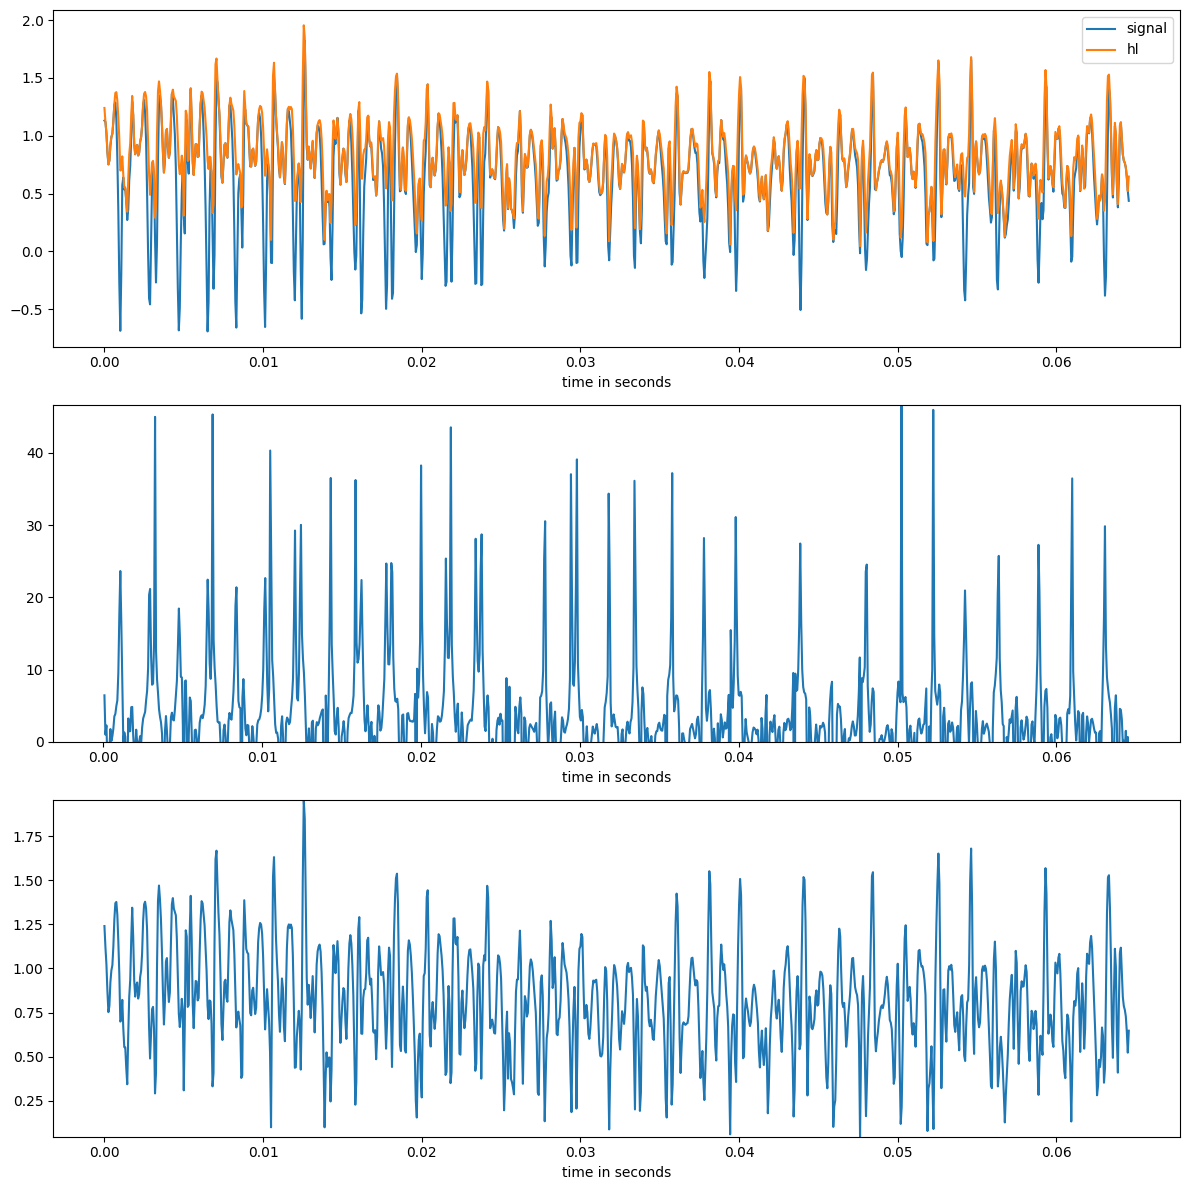

In [29]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(12, 12))
ax0.plot(t, motion_axis, label='signal')
ax0.plot(t, hl, label='hl')
ax0.set_xlabel("time in seconds")
ax0.legend()
ax1.plot(t[1:], ifr)
ax1.set_xlabel("time in seconds")
ax1.set_ylim(0.0, ifr_max)
ax2.plot(t, iamp)
ax2.set_xlabel("time in seconds")
ax2.set_ylim(iamp_min, iamp_max)
fig.tight_layout()